In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("Data/tenant_default_risk_dataset.csv")

In [3]:
df.head()

,Tenant_ID,Age,Occupation,Income_Level,Credit_Score,Past_Default,Debt_to_Income_Ratio,Monthly_Rent,Lease_Term_Months,Security_Deposit,Property_Type,Property_Size_SqFt,Unemployment_Rate,GDP_Growth_Rate,Default_Risk
0,1,56,Full-time,148416,792,0,0.24,845,24,845,Residential,2628,8.87,2.41,0
1,2,46,Self-employed,98947,637,0,0.43,4411,24,8822,Commercial,4436,6.46,1.97,1
2,3,32,Unemployed,138972,365,0,0.35,648,24,648,Residential,2673,8.97,1.39,1
3,4,60,Unemployed,94716,721,1,0.49,1539,36,1539,Commercial,4209,6.85,2.30,1
4,5,25,Freelancer,67993,839,0,0.48,1890,24,3780,Residential,629,9.89,2.11,1


In [19]:
df['GDP_Growth_Rate'].max()

5.0

In [17]:
df.shape

(5000, 15)

In [19]:
dataset_columns = list(df.columns)
dataset_columns

['Tenant_ID',
 'Age',
 'Occupation',
 'Income_Level',
 'Credit_Score',
 'Past_Default',
 'Debt_to_Income_Ratio',
 'Monthly_Rent',
 'Lease_Term_Months',
 'Security_Deposit',
 'Property_Type',
 'Property_Size_SqFt',
 'Unemployment_Rate',
 'GDP_Growth_Rate',
 'Default_Risk']

In [21]:
df.dtypes

Tenant_ID                 int64
Age                       int64
Occupation               object
Income_Level              int64
Credit_Score              int64
Past_Default              int64
Debt_to_Income_Ratio    float64
Monthly_Rent              int64
Lease_Term_Months         int64
Security_Deposit          int64
Property_Type            object
Property_Size_SqFt        int64
Unemployment_Rate       float64
GDP_Growth_Rate         float64
Default_Risk              int64
dtype: object

In [23]:
df.isnull().sum()

Tenant_ID               0
Age                     0
Occupation              0
Income_Level            0
Credit_Score            0
Past_Default            0
Debt_to_Income_Ratio    0
Monthly_Rent            0
Lease_Term_Months       0
Security_Deposit        0
Property_Type           0
Property_Size_SqFt      0
Unemployment_Rate       0
GDP_Growth_Rate         0
Default_Risk            0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenant_ID             5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Occupation            5000 non-null   object 
 3   Income_Level          5000 non-null   int64  
 4   Credit_Score          5000 non-null   int64  
 5   Past_Default          5000 non-null   int64  
 6   Debt_to_Income_Ratio  5000 non-null   float64
 7   Monthly_Rent          5000 non-null   int64  
 8   Lease_Term_Months     5000 non-null   int64  
 9   Security_Deposit      5000 non-null   int64  
 10  Property_Type         5000 non-null   object 
 11  Property_Size_SqFt    5000 non-null   int64  
 12  Unemployment_Rate     5000 non-null   float64
 13  GDP_Growth_Rate       5000 non-null   float64
 14  Default_Risk          5000 non-null   int64  
dtypes: float64(3), int64(

In [29]:
# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Occupation: ['Full-time' 'Self-employed' 'Unemployed' 'Freelancer' 'Part-time']
Property_Type: ['Residential' 'Commercial']


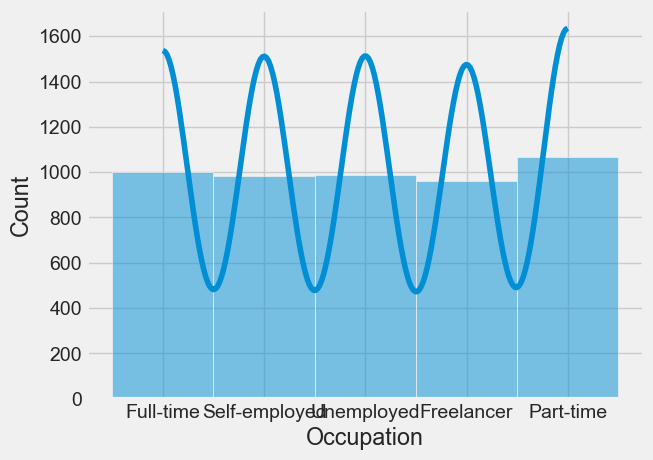

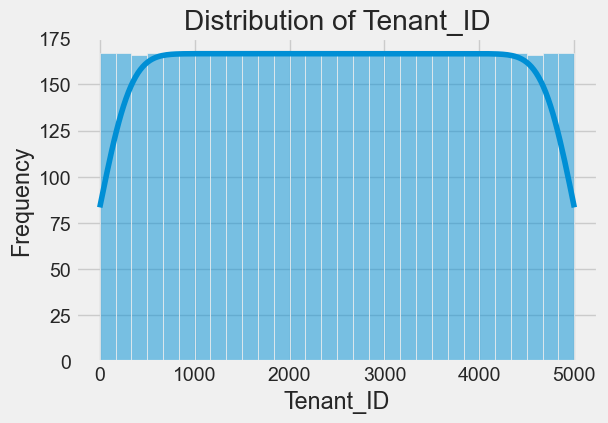

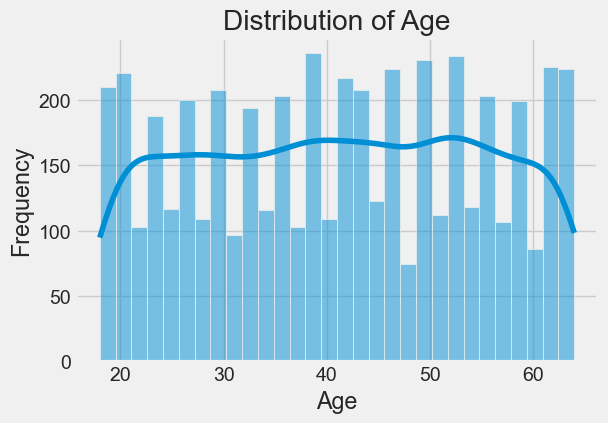

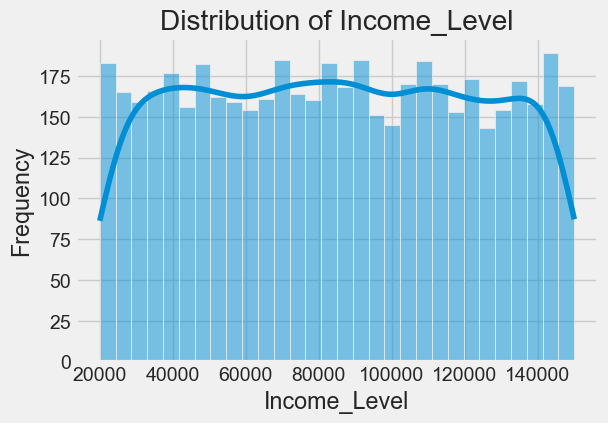

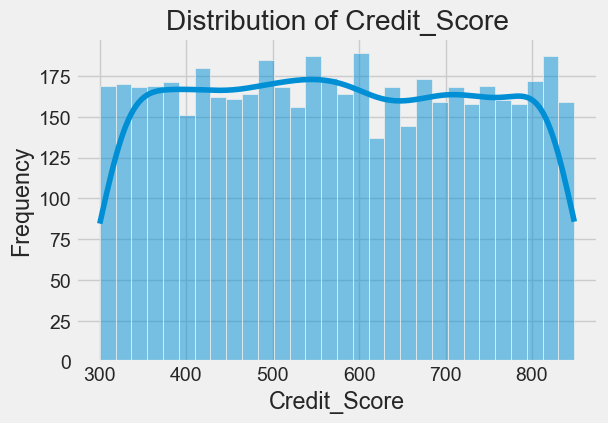

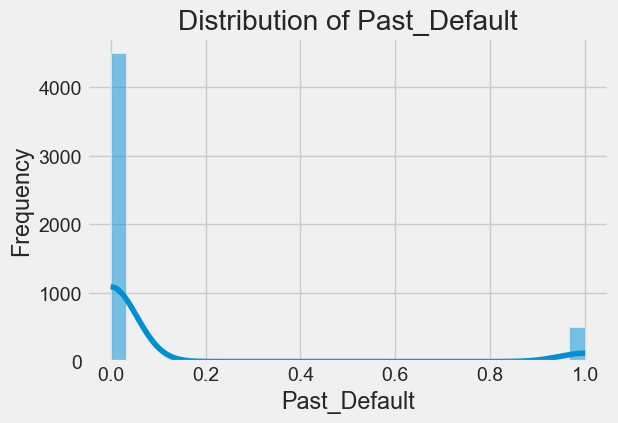

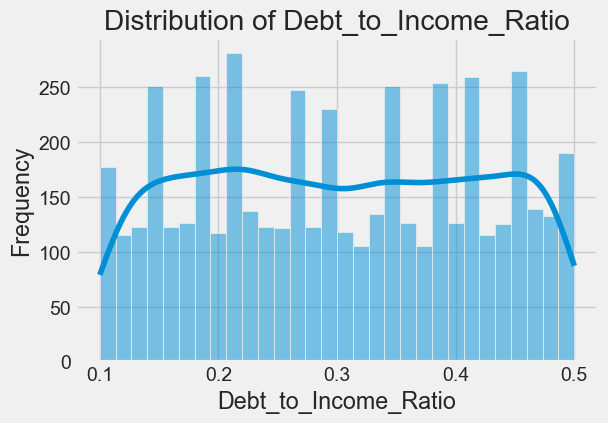

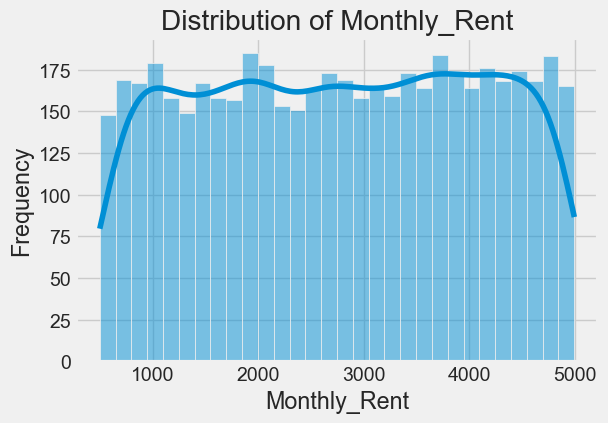

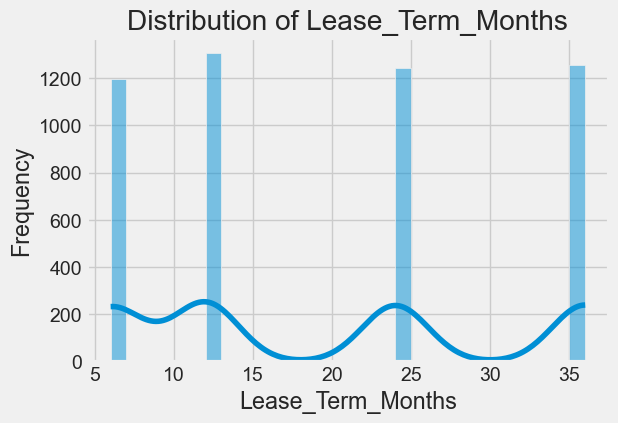

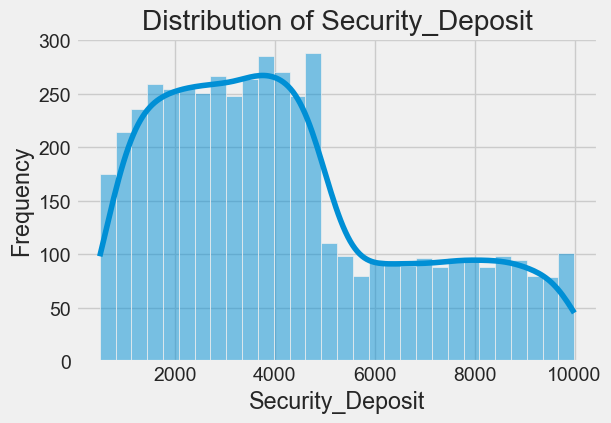

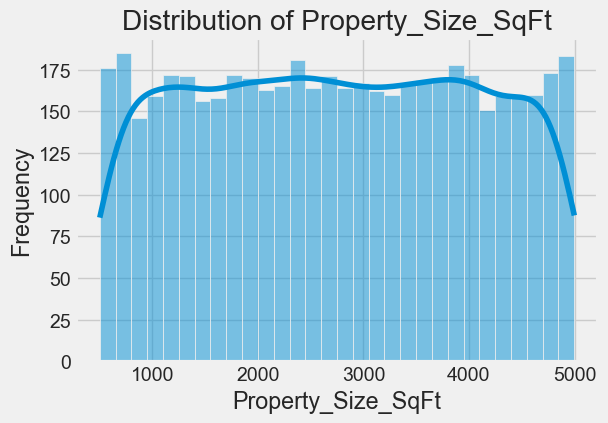

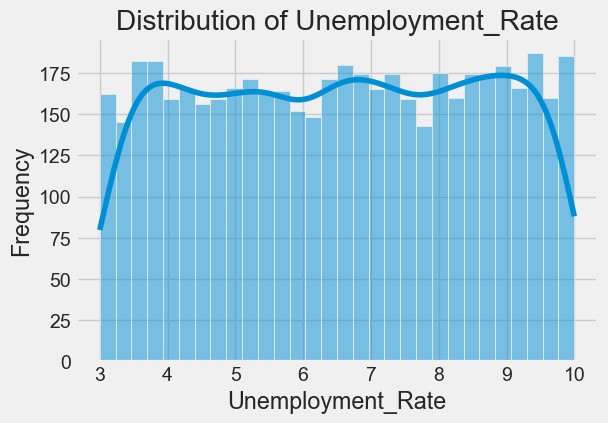

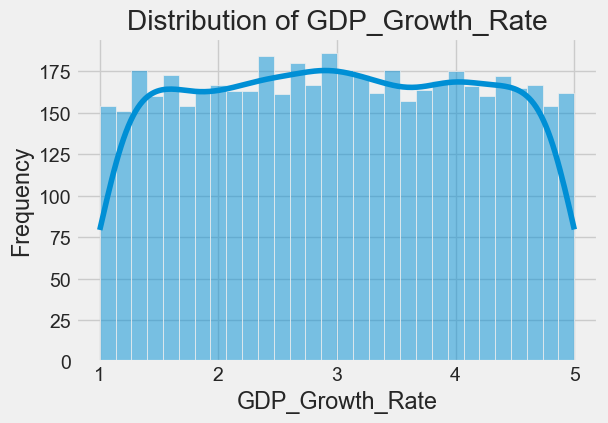

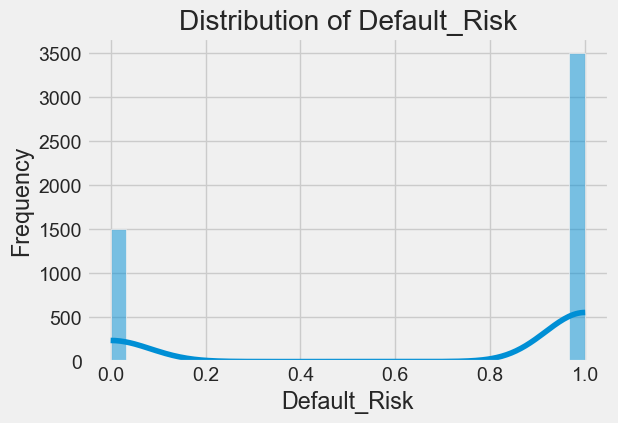

In [31]:
# Plot the distribution of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [41]:
# # Visualize correlations between numerical features
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# plt.figure(figsize=(10, 8))
# correlation_matrix = .corr()
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

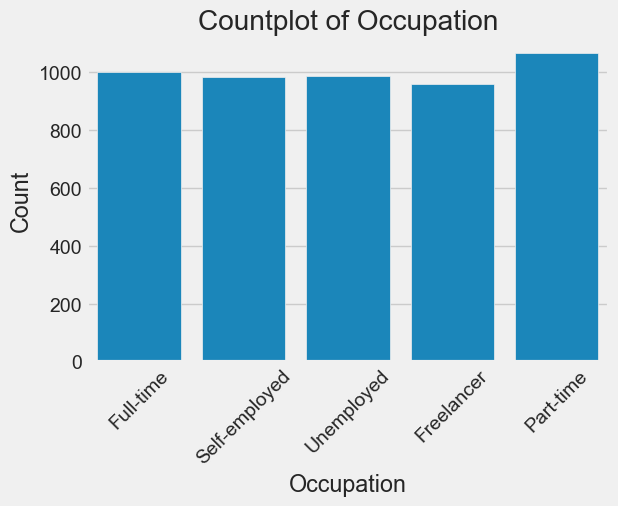

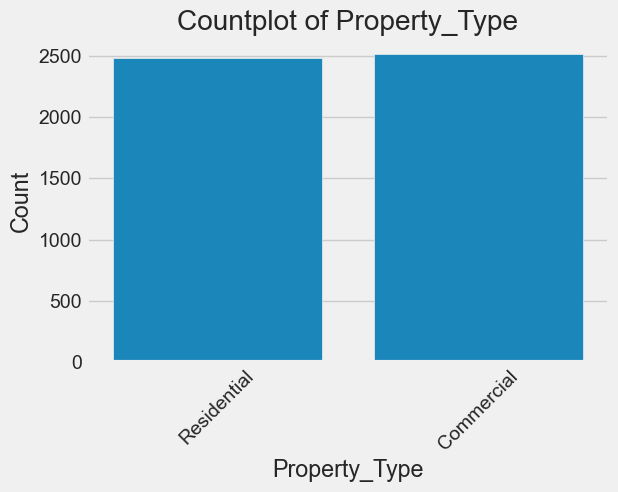

In [39]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

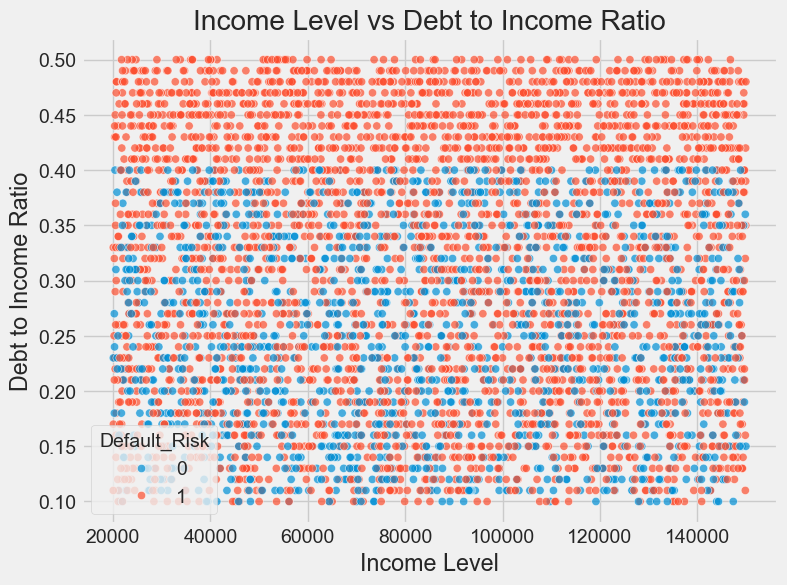

In [43]:
# Explore relationships between key variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income_Level', y='Debt_to_Income_Ratio', hue='Default_Risk', alpha=0.7)
plt.title("Income Level vs Debt to Income Ratio")
plt.xlabel("Income Level")
plt.ylabel("Debt to Income Ratio")
plt.show()

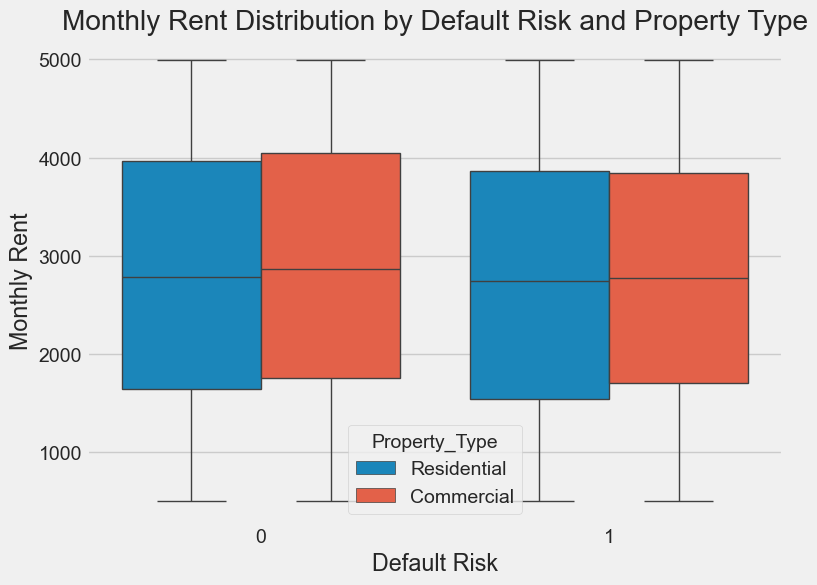

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Default_Risk', y='Monthly_Rent', hue='Property_Type')
plt.title("Monthly Rent Distribution by Default Risk and Property Type")
plt.xlabel("Default Risk")
plt.ylabel("Monthly Rent")
plt.show()

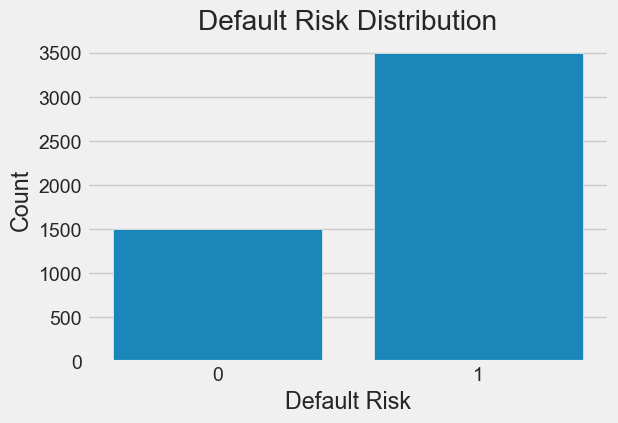

In [47]:
# Analyze Default_Risk distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Default_Risk')
plt.title("Default Risk Distribution")
plt.xlabel("Default Risk")
plt.ylabel("Count")
plt.show()

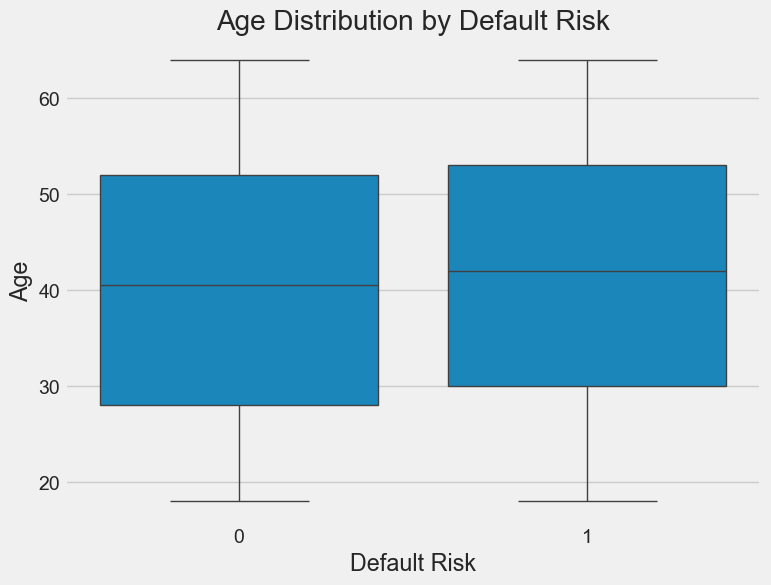

In [49]:
# Analyze the relationship between Age and Default_Risk
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Default_Risk', y='Age')
plt.title("Age Distribution by Default Risk")
plt.xlabel("Default Risk")
plt.ylabel("Age")
plt.show()

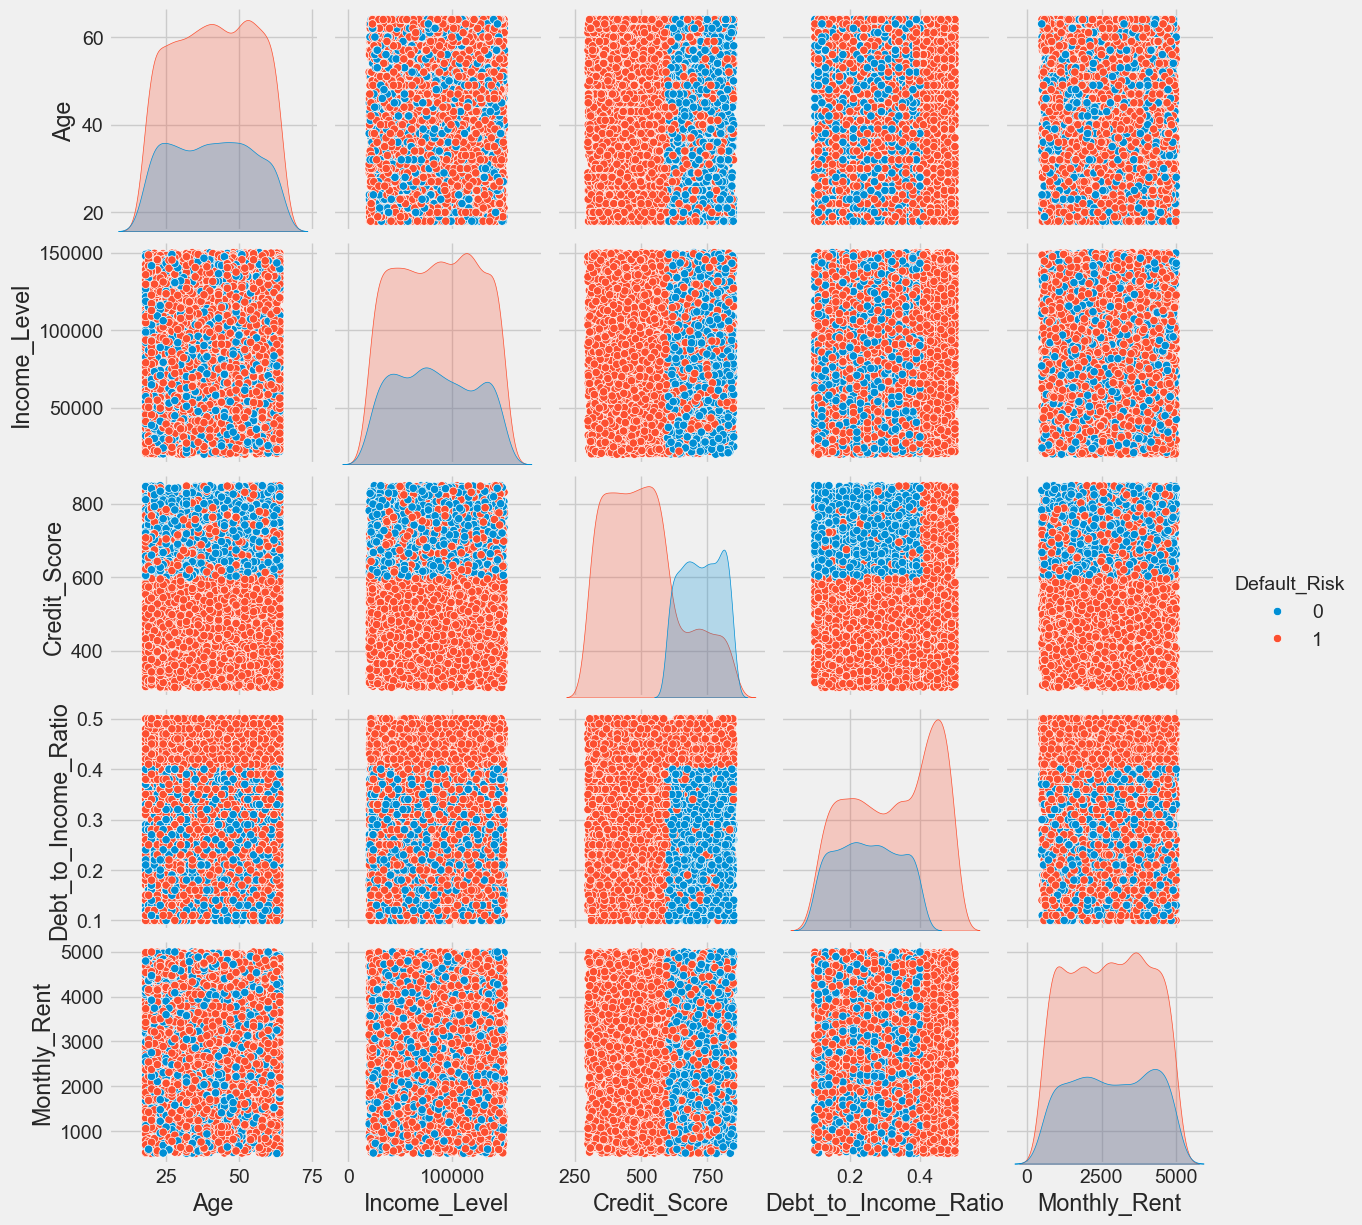

In [51]:
# Pairplot for selected numerical variables
selected_cols = ['Age', 'Income_Level', 'Credit_Score', 'Debt_to_Income_Ratio', 'Monthly_Rent', 'Default_Risk']
sns.pairplot(df[selected_cols], hue='Default_Risk', diag_kind='kde')
plt.show()